#### MSDS 7331: MiniLab 1 - SVM & LR Classification 
#### Team: Scott Anderwald, Marvin Scott, Salomon Gilles, Earl Shaw 
#### Bank Marketing Data 
#### February 19, 2017


### Data Set Insight
In this project, our objective is to build a classification model using data from several direct marketing campaigns carried out by a Portuguese bank to class whether or not the current bank customer will sign up for a term deposit, i.e an investment product designed to provide the customer with a specified amount of interest on their cash deposit. This classification model could potentially assist bank representatives in prioritizing which customers to contact. That is, rather than spend time contacting customers identified as not likely to sign up for the term deposit, they can direct their attention to only those customers likely to respond, thereby better utilizing their time and resources. Two approaches will be used in building the models, namely: 'Logisitc Regression', and 'Support Vector Machines'.

The raw data represents data collected by a Portuguese bank over several direct marketing campaigns to its customers, primarily by phone. All customer contact was carried out by bank representatives without the aid of automated calls. Data from the campaigns was provided in a flat file report based on information used by the representatives during the call. There were a total of 17 campaigns executed between May 2008 and November 2010. The data set provided by the UCI Machine Learning Repository contained 41,188 records and 21 attributes including 1 target variable, which is represented in the raw data as 'y', with values of 'yes' or 'no, indicating whether or not the customer signed up for the investment product. Furthermore, each observation in the data set represents a customer contacted during a campaign. Given the possibility of duplicate contacts, the only duplicate records removed were those in which all attributes contained the same information, which will not affect training a model to classify the target variable. Additionally, it seems unlikely that a customer would have been contacted more than once and each attribute had the same value. For example, if on the first call, the bank representative spoke with the customer for 5 minutes, it doesn't seem reasonable that on a second or third call, the contact duration also lasted 5 minutes, along with other variables remaining static that could potentially change. This, along with other situations lead to the removal of duplicates of this sort. Also, as noted in several box plots provided in Lab 1, outliers don't appear to be an issue and won't have an impact on classification performance of the model.

#### Sources:
1. http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
2. S. Moro, P. Cortez, P. Rita. "A Data-Driven Approach to Predict the Success of Bank Telemarketing". Decision Support Systems, Elsevier, 62:22-31, June 2014. http://bru-unide.iscte.pt/RePEc/pdfs/13-06.pdf

In [1]:
#Loading relevant libraries used throughout the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
import scipy.stats
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

#Loading the "bank_data.csv" file
bank=pd.read_csv('C:\\Users\\Earl\\Documents\\MSDS 7331\\Data\\Lab 1\\bank_data.csv')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Verifying Data Quality

As mentioned prior, outliers are not an issue that will impact training a model using the raw data. However, for the continuous variable, 'pdays', which represents the number of days since the customer was last contacted for a previous campaign, for records in which the customer was not contacted in a previous campaign, the value was coded as '999'. This represents ~96% of the observations for this variable. Due to this high amount of irregular values the feature will be removed from the dataset. Also, duplicates will be removed in which all attributes of an observation contain identical values to other observations. This will not have an impact on the classification model, but is primarily done to eliminate redundancies in the data. 11 observations with duplicates are removed, leaving 41,176 observations for model development. Additionally, missing values will not compromise the analysis, as all values are populated.41,188 observations are initially available prior to data transformations, processing, etc. 20 features and 1 target variable with class labels useful for training a model are included in the data.

In [2]:
# Checking any possible missing values
print ('Missing Values:'),np.count_nonzero(bank.isnull())
# np.count_nonzero(bank['age'].isnull())
# np.count_nonzero(bank['job'].isnull())
# np.count_nonzero(bank['marital'].isnull())
# np.count_nonzero(bank['education'].isnull())
# np.count_nonzero(bank['default'].isnull())
# np.count_nonzero(bank['housing'].isnull())
# np.count_nonzero(bank['loan'].isnull())
# np.count_nonzero(bank['contact'].isnull())
# np.count_nonzero(bank['month'].isnull())
# np.count_nonzero(bank['day_of_week'].isnull())
# np.count_nonzero(bank['duration'].isnull())
# np.count_nonzero(bank['campaign'].isnull())
# np.count_nonzero(bank['pdays'].isnull())
# np.count_nonzero(bank['previous'].isnull())
# np.count_nonzero(bank['poutcome'].isnull())
# np.count_nonzero(bank['emp.var.rate'].isnull())
# np.count_nonzero(bank['cons.price.idx'].isnull())
# np.count_nonzero(bank['cons.conf.idx'].isnull())
# np.count_nonzero(bank['euribor3m'].isnull())
# np.count_nonzero(bank['nr.employed'].isnull())
# np.count_nonzero(bank['y'].isnull())

Missing Values: 0


In [3]:
# Removing duplicate observations/clients from dataset
bank2=bank.drop_duplicates()
print (bank2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Data Pre-Processing
Categorical variables are transformed into dummy variables with (1/0) values so they can be used as inputs in the classification model, and the target variable is transformed to contain 0's or 1's instead of the text values,  'yes' or 'no'. Additionally, in order to train the model, the target variable, 'y', will need to be isolated from the training samples. So, once the target variable is removed from the core data set containing all features, it is then transformed from its dataframe type into an array (i.e. numpy.ndarray) which contains all class labels needed to build the model. While a separate array, 'X', is created from the remaining dataframe containing the training samples. This format fits the that desired by Scikit-Learn's 'Logistic Regression' module (i.e. sklearn.linear_model.LogisticRegression) and its 'Linear Support Vector Classification' classifier, (i.e. sklearn.svm.LinearSVC), which will be used to train the classification models.

In [4]:
# Changing variable names to avoid syntax issues within the Python operating environment and to more intuitive names.
bank3=bank2.rename(columns={'job':'job_type','marital':'marital_status','education':'education_level',
                            'default':'curr_credit_default','housing':'curr_housing_loan','contact':'contact_type',
                            'loan':'curr_personal_loan','month':'last_contact_month','day_of_week':'last_contact_day',
                            'pdays':'days_since_last_contact','previous':'num_contacts_pre_campaign',
                            'poutcome':'prior_campaign_outcome','emp.var.rate':'emp_var_rate','campaign':'num_campaign_contacts',
                            'cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'num_employees_qtr','y':'target'})
# New variable names:
# -------------------
# age = age
# job = job_type
# marital = marital_status
# education  = education_level
# default = curr_credit_default
# housing = curr_housing_loan
# loan = curr_personal_loan
# contact = contact_type
# month = last_contact_month
# day_of_week = last_contact_day
# duration = duration
# campaign = num_campaign_contacts
# pdays = days_since_last_contact
# previous = num_contacts_pre_campaign
# poutcome = prior_campaign_outcome
# emp.var.rate = emp_var_rate
# cons.price.idx = cons_price_idx
# euribor3m = euribor3m
# nr.employed = num_employees_qtr
# y = target


bank3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age                          41176 non-null int64
job_type                     41176 non-null object
marital_status               41176 non-null object
education_level              41176 non-null object
curr_credit_default          41176 non-null object
curr_housing_loan            41176 non-null object
curr_personal_loan           41176 non-null object
contact_type                 41176 non-null object
last_contact_month           41176 non-null object
last_contact_day             41176 non-null object
duration                     41176 non-null int64
num_campaign_contacts        41176 non-null int64
days_since_last_contact      41176 non-null int64
num_contacts_pre_campaign    41176 non-null int64
prior_campaign_outcome       41176 non-null object
emp_var_rate                 41176 non-null float64
cons_price_idx               41176 non-null float64
cons_conf_idx              

In [5]:
##Create dataframe for categorical/class variables
banking = pd.DataFrame()
bank3[['job_type', 'marital_status', 'education_level', 
'curr_credit_default', 'curr_housing_loan','curr_personal_loan', 'contact_type']].describe().transpose()

,count,unique,top,freq
job_type,41176,12,admin.,10419
marital_status,41176,4,married,24921
education_level,41176,8,university.degree,12164
curr_credit_default,41176,3,no,32577
curr_housing_loan,41176,3,yes,21571
curr_personal_loan,41176,3,no,33938
contact_type,41176,2,cellular,26135


In [6]:
# Convert the categorical variables showing each class as
#a column for each. Also converting data types to binary values so that the model can interpret 
#correctly 

catigoricals_to_transform = ['job_type', 'marital_status', 'education_level', 'curr_credit_default', 'curr_housing_loan','curr_personal_loan', 'contact_type', 'last_contact_month','last_contact_day','prior_campaign_outcome']
banking = pd.get_dummies(bank3, columns = catigoricals_to_transform)

In [7]:
#Create new column "IsSubcribe" from existing "target" 
#attribute and assigned True/False value; yes = True, no = False 

banking['IsSubscribe'] = banking.target == 'yes'

##Boolean Data Type
banking['IsSubscribe'] = banking.IsSubscribe.astype(np.bool)



53 dummy variables were created from the categorical variables in the data. Excluding the target variable, there are 64 features available for use in training a classifier.



### Correlation Revisited

We revisited the correlation heatmap provided in Lab 1 to be sure that any redundant features are located and removed before proceeding with training the classifier. If two or more features are strongly correlated (i.e. a Pearson Correlation Coefficient close to 1), only one of the features will remain in the training sample so the information provided by the feature is preserved, while any redundancy is eliminated. Additionally, any inputs that appear vague and may pose a challenge to interpret will be removed. The features: 'emp_var_rate' (correlation=0.97) and 'num_employees_qtr' (correlation=0.95) will be removed due to their strong correlation with 'euribor3m'.

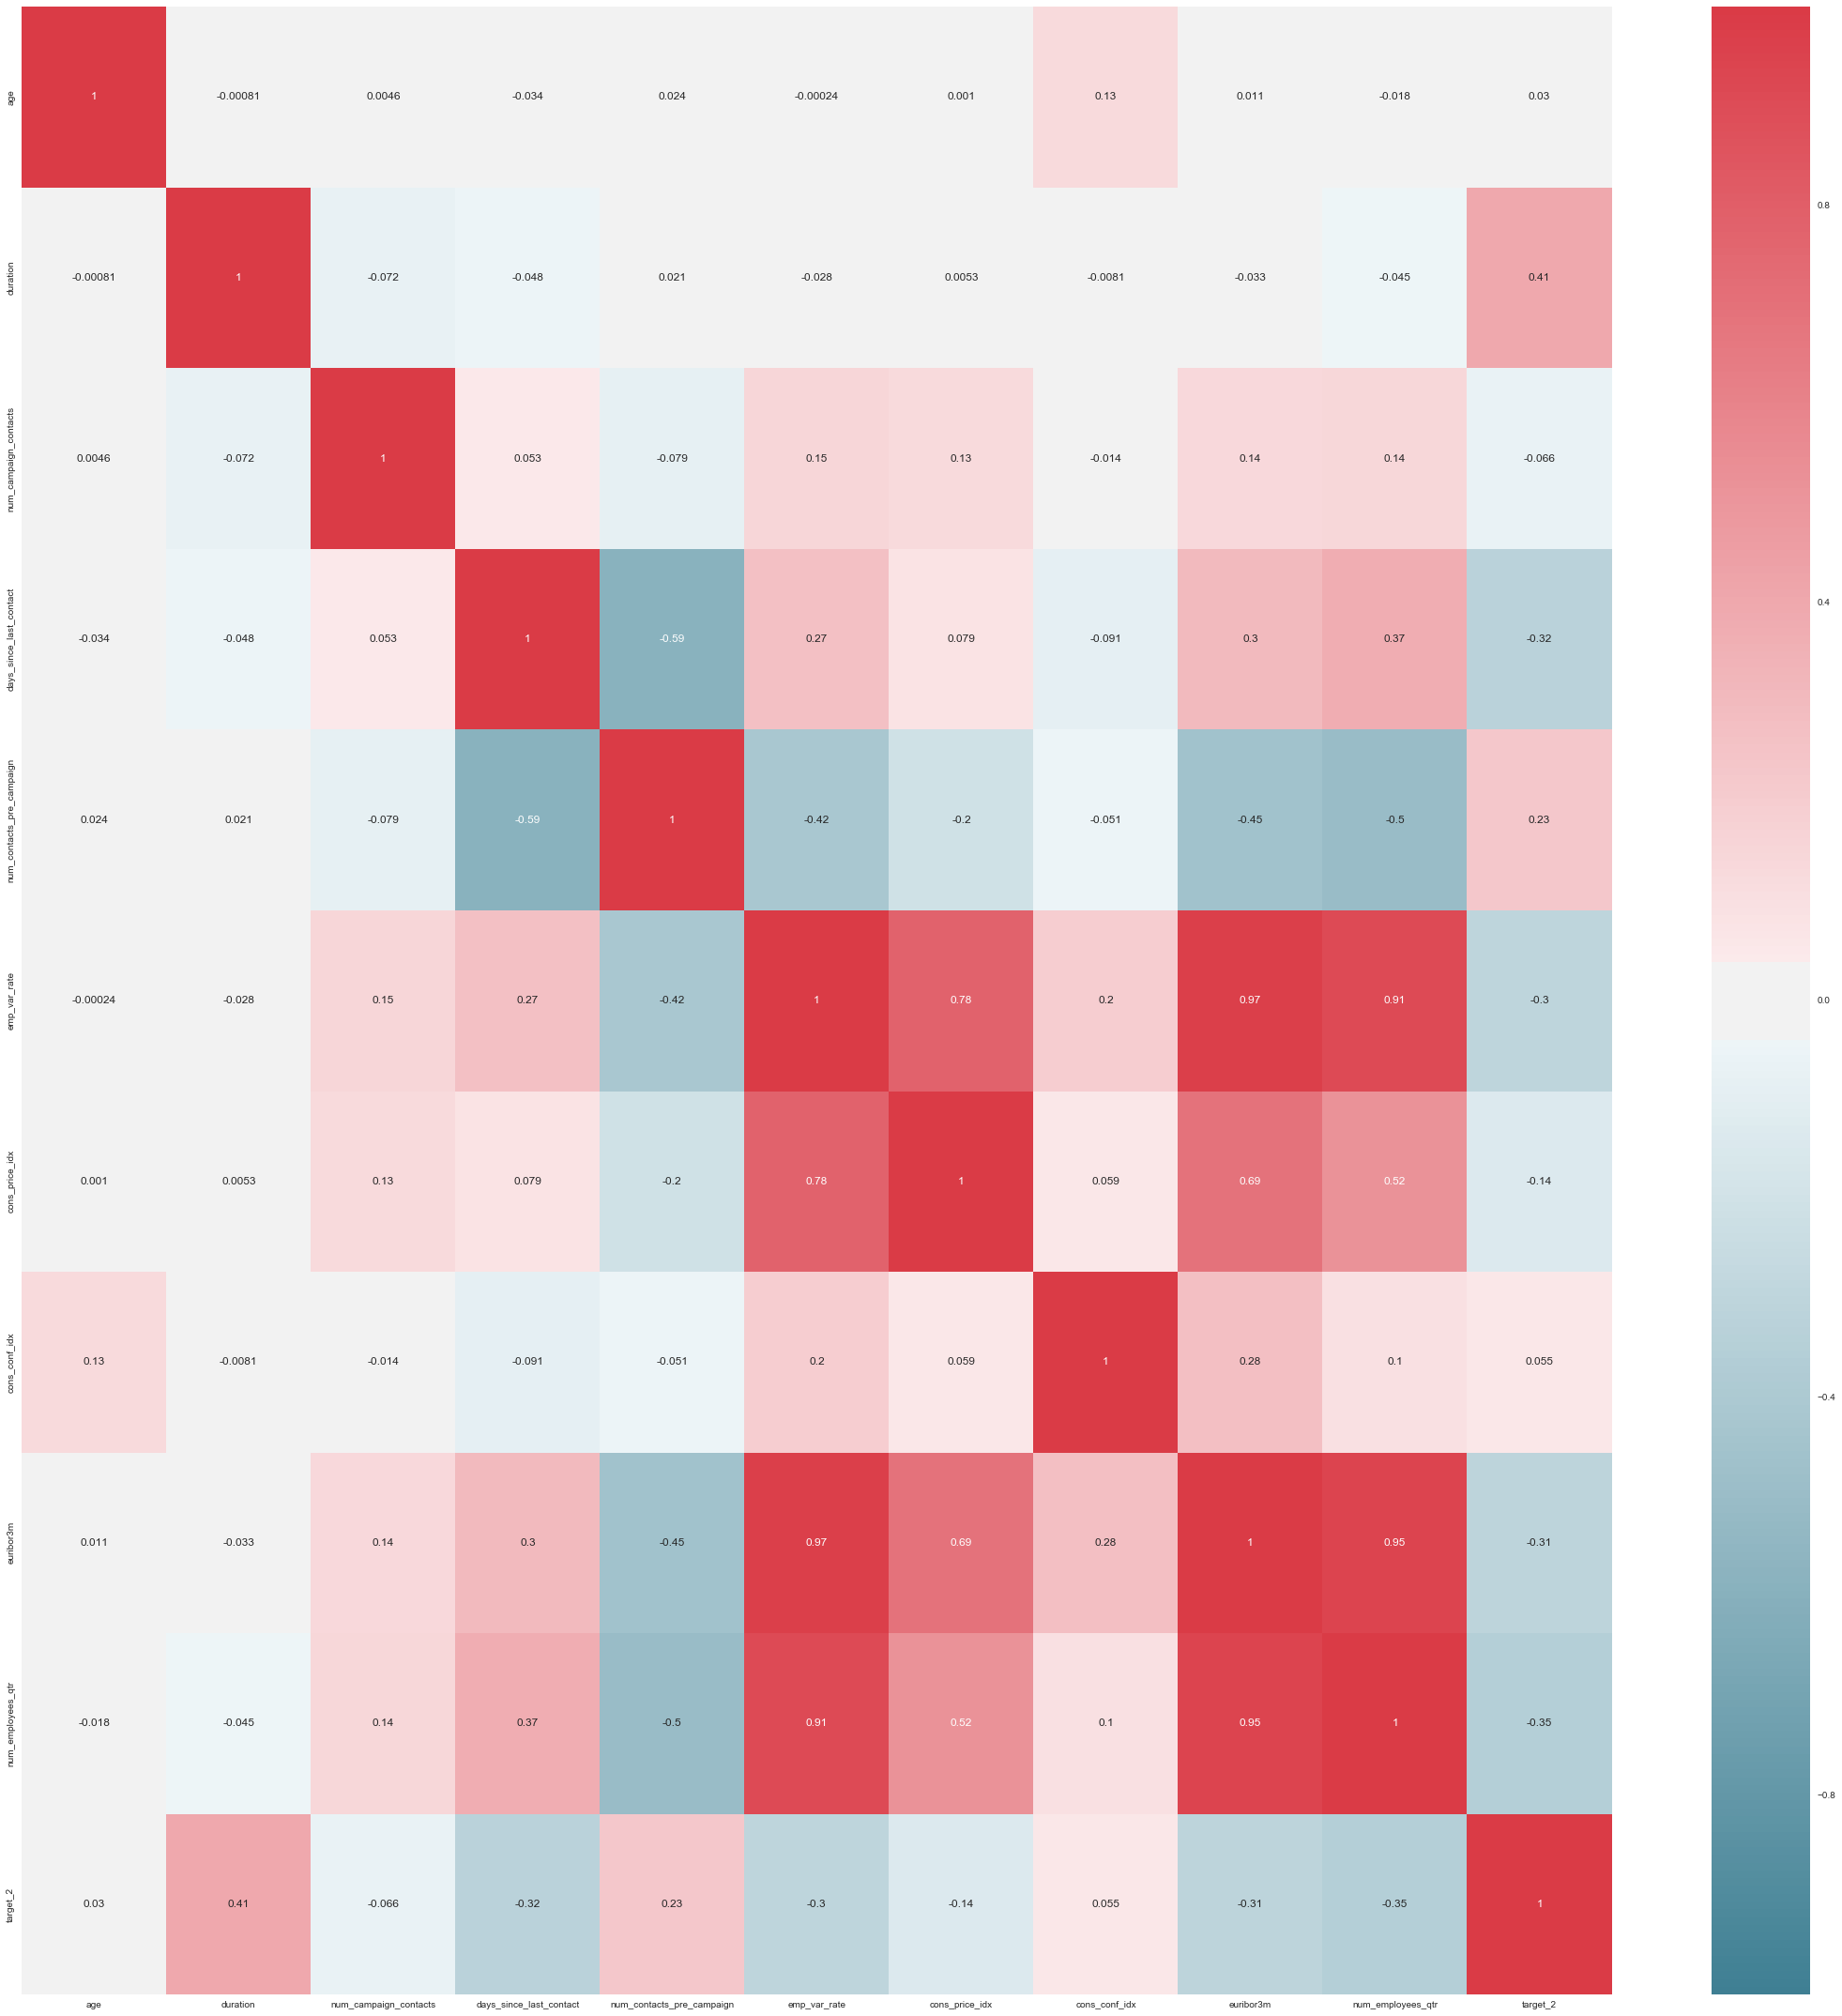

In [8]:
# Determining correlation among features and target variable
banking_b=bank3
target_2=[]
for row in banking_b['target']:
    if row=='yes':
        target_2.append(1)
    else:
        target_2.append(0)
banking_b['target_2']=target_2

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(banking_b.corr(), cmap=cmap, annot=True)
f.tight_layout()

In [9]:
#Deleted column "target" because the data type can't be use for claffification modelling 
del banking['target']
del banking['num_employees_qtr']
del banking['emp_var_rate']
del banking['days_since_last_contact']

In [10]:
print (banking.shape)

(41176, 61)


### Model Development - 'Logistic Regression'
In this section, a classification model will be developed using the 'Logistic Regression' module of Scikit-Learn based on the training samples represented by, 'X', and the class labels represented by, 'y'. From Lab 1, it was determined that ~11.3% of the customers contacted actually signed up for the bank's investment product. So, ~88.7% of our data set did not sign up for the investment product. To build the model, an 80/20 training/testing split will be used. That is, 80% of our development data will be used to train the model, while the remaining 20% will be held out and used to gauge model accuracy. The process of splitting the data into a training and test set will be repeated three times to accomplish what is called 'k-fold validation'. This is designed to minimize the risk of overfitting, which results when a model is trained to fit the training data perfectly, but will missclassify new observations at a higher rate.  The hold out cross validation method is built into scikit-learn. The number of folds is arbitrary, but it must be taken into consideration that this method increases processing time, so 3 iterations are used to help reduce overfitting while not considerably increasing the computational expense. 63 features remain in the training sample for model development.

Remove this part if it isn't used.
In building the model, the first iteration included all features in X, while later iterations included a subset of features in X, referenced as, 'X_2', and is based on how frequent the values were for a given variable. This frequency distribution analysis was done in Lab 1. For example, for the variable 'marital_status', since the values 'married' and 'single' represented the majority of all values in which the customer signed up for the investment product, dummy variables representing 'married' and 'single' were included in the model, while dummy variables for 'divorced' and'unknown' were held out of the model. This was done in an effort to improve model performance.

Stochastic Gradient Descent (SGD) is not needed in the development of this classifier since our training data contains less than 40k observations. If our training set contained 100k observations or more, SGD would serve as a viable option to increase efficiency and processing time to build the model.

In [11]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'IsSubscribe' in banking:
    y = banking['IsSubscribe'].values # get the labels we want
    del banking['IsSubscribe'] # get rid of the class label
    X = banking.values # use everything else to predict!



ShuffleSplit is a CV function/method, in this example it selects 3 different folds of the all the instances of the dataset

In [12]:
#ShuffleSplit is a CV function/method. 
#Cross Validation peforms three times/folds or different populations of the same data set with all instances/records included. 
cross_val_iterations = 3
number_of_instances = len(y)
cross_val_object = ShuffleSplit(n_splits=cross_val_iterations, test_size  = 0.2)
                         
print(cross_val_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)



"L2" is commonly used as the regularization technique, while C=1.0 serves as the default value.

In [13]:

## Logistic Regression##
# run logistic regression and vary some parameters
#create a reusable logisitic regression object with different learning weights
#l2 ridge penalties applied to better minimize prediction error
#Low Cost of 1 used as trial to derived maximum margin from optimal boundary

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object


In [14]:
#Testing how well our "test data" works against the "training data"

index = 0

for train_indices, test_indices in cross_val_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # use training data to train reusable logisitc regression model
    lr_clf.fit(X_train,y_train)     # train object
    y_hat = lr_clf.predict(X_test)  # test prediction

    # training, testing accuracy and confusion matrix
    accurazy = mt.accuracy_score(y_test,y_hat)
    confuxion = mt.confusion_matrix(y_test,y_hat)
    
    print "====Iteration", index, " ===="
    print "accuracy", accurazy 
    print "confusion matrix\n"
    print confuxion
    index += 1
    

====Iteration 0  ====
accuracy 0.911000485673
confusion matrix

[[7133  198]
 [ 535  370]]
====Iteration 1  ====
accuracy 0.91209324915
confusion matrix

[[7122  186]
 [ 538  390]]
====Iteration 2  ====
accuracy 0.911728994658
confusion matrix

[[7126  186]
 [ 541  383]]


In [15]:
### use cross_val_object to traverse training and testing sets.

for index, (train_indices, test_indices) in enumerate(cross_val_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices])        # test predition

    # print the accuracy and confusion matrix 
    print "====Iteration",index," ===="
    print "accuracy", mt.accuracy_score(y[test_indices],y_hat)
    print "confusion matrix\n"
    print mt.confusion_matrix(y[test_indices],y_hat)
    

###Both "Accuracy" and "Confusion Matrix" must be evaluated to determine how well the model predicts/classify 
    
#### First Model has accuracy of 91%;model had 7118 True Positives, i.e. 7118 times model predicted true and it was 
### actually true whereas 189 times it predicted True and it was actually False.(False Postives)

#### Second Model also has accuracy roughly of 91%;model had 7126 True Positives, i.e. 7126 times model predicted true and it was 
### actually true whereas 166 times it predicted True and it was actually False.(False Postives)

#### Final Model also has 91% accuracy ;model had 7092 True Positives, i.e. 7092 times model predicted true and it was 
### actually true whereas 225 times it predicted True and it was actually False.(False Postives)

====Iteration 0  ====
accuracy 0.907357940748
confusion matrix

[[7115  206]
 [ 557  358]]
====Iteration 1  ====
accuracy 0.910029140359
confusion matrix

[[7115  202]
 [ 539  380]]
====Iteration 2  ====
accuracy 0.908936376882
confusion matrix

[[7138  174]
 [ 576  348]]


In [16]:
### --------------------------------------------
### Shortest way to get accuracy scores
### --------------------------------------------
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y = y, cv = cross_val_object)
print accuracies 

[ 0.91209325  0.91015056  0.905051  ]


In [17]:
### --------------------------------------------
### use Widget to run accuracy test interactively
###  to manipulate cost parameter if neccessary
###      else set _manual to false
### --------------------------------------------

from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) 
    accuracies = cross_val_score(lr_clf, X, y=y, cv=cross_val_object)
    print(accuracies)

wd.interact(lr_explor, cost = (0.001, 1000.0, 0.05), __manual = True)



<function __main__.lr_explor>

The value of 'C' or 'cost' is set to '1' by default and can be used to increase or decrease possible overfitting. The higher the value for C, the lower the errors and the higher the chance of overfitting. While lower values for C lead to higher errors and a lower chance of overfitting. Changing the values for C doesn't impact accuracy as demonstrated in the widget above.

### Model Performance - 'Logistic Regression'
Model accuracy is ~91% on average. Judging by the confusion matrix, after normalizing the weights, based on the test set, ~93% of non-subscribers were classified correctly on the test set, with 7% missclassified as subscribers. While ~66% of subscribers were classified correctly, with 34% missclassified as non-subscribers. Currently, the model more accurately classifies non-subscribers than subscribers. This is primarily a result of having only ~11% of observations represent subscribers. With more subscribers to learn from, the classifier's accuracy would undoubtedly be higher.

### Interpreting Weights of Features in Model

In [18]:
# Non-normalized Weights

weights = lr_clf.coef_.T # build column vector by transposing - T
variable_names = banking.columns

# traverse the coefficients
for coef, variable_name in zip(weights, variable_names):
    print(variable_name, 'has weight of', coef[0])
    
####Determine largest and smallest weight of the variablee

('age', 'has weight of', -0.00041519580131819841)
('duration', 'has weight of', 0.0046381704993615222)
('num_campaign_contacts', 'has weight of', -0.044692154520832771)
('num_contacts_pre_campaign', 'has weight of', 0.15411468998449435)
('cons_price_idx', 'has weight of', 6.6549647036321876e-05)
('cons_conf_idx', 'has weight of', 0.029706513454788593)
('euribor3m', 'has weight of', -0.62122673406230078)
('job_type_admin.', 'has weight of', 0.034956277294210129)
('job_type_blue-collar', 'has weight of', -0.32544025045588765)
('job_type_entrepreneur', 'has weight of', -0.17364126257056853)
('job_type_housemaid', 'has weight of', 0.046155745783545893)
('job_type_management', 'has weight of', -0.086332462391907075)
('job_type_retired', 'has weight of', 0.39625896641178504)
('job_type_self-employed', 'has weight of', -0.13889929548161192)
('job_type_services', 'has weight of', -0.11290164196883569)
('job_type_student', 'has weight of', 0.28184104579147135)
('job_type_technician', 'has weigh

In [19]:
### -------------------------------------------------------------
### - Normalize to have weights that have predictive magnitude
### -------------------------------------------------------------

from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train) 
X_test_scaled = scl_obj.transform(X_test)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) 
lr_clf.fit(X_train_scaled,y_train)    # train object

y_hat = lr_clf.predict(X_test_scaled) # get preditions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T, banking.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])



('accuracy:', 0.91148615832928603)
[[7126  186]
 [ 543  381]]
('euribor3m', 'has weight of', -1.1368992989787809)
('last_contact_month_may', 'has weight of', -0.31189793000815969)
('prior_campaign_outcome_failure', 'has weight of', -0.14009142906692512)
('num_campaign_contacts', 'has weight of', -0.11491884766779485)
('contact_type_telephone', 'has weight of', -0.082819810895541607)
('job_type_blue-collar', 'has weight of', -0.076895954098533101)
('last_contact_day_mon', 'has weight of', -0.057679047637844739)
('curr_credit_default_unknown', 'has weight of', -0.057174622581493466)
('education_level_high.school', 'has weight of', -0.041845556514062889)
('education_level_basic.9y', 'has weight of', -0.033152875198746087)
('education_level_basic.4y', 'has weight of', -0.029736448753999559)
('marital_status_divorced', 'has weight of', -0.02175835080521072)
('marital_status_married', 'has weight of', -0.017794644891195786)
('job_type_services', 'has weight of', -0.016864582329910841)
('curr

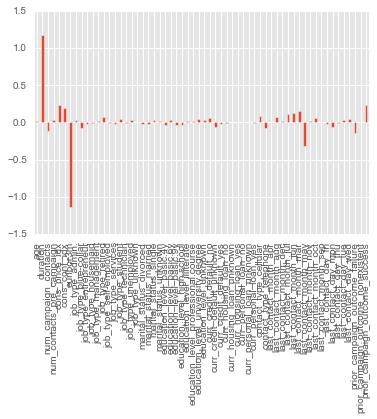

In [20]:
# plot pandas Series

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0], index = banking.columns)
weights.plot( kind = 'bar')
#plt.axis([51, 60, -1, 1.5])
plt.show()

In [179]:
### -----------------------------------------------------------------------------------------
### For more improvement and guarding against overfitting: 
### remove variables that are highly related to one another or ones that are irrelevant
### and keep going with the weights analysis. 
###     What variables would you remove?
### ----------------------------------------------------------------------------------------

In [21]:
### normalize the features based upon the mean and standard deviation of each column.

from sklearn.pipeline import Pipeline
#  use PipeLines to apply the StandardScaler function inside of the cross-validation loop 

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05) 

# create pipline
piped_object = Pipeline([('scale', std_scl), ('logit_model', lr_clf)]) 
weights = []
# run the pipline cross validated
for index, (train_indices, test_indices) in enumerate(cross_val_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices]) 
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    

weights = np.array(weights)

In [22]:
### ----------------------------------------------------
### run import and mode() function at the start of every notebook
### ----------------------------------------------------

import plotly
plotly.offline.init_notebook_mode() 

# plot this here to determine how to evaluate 

error_y = dict(type='data', array=np.std(weights,axis=0), visible = True)

graph1 = {'x': banking.columns, 'y': np.mean(weights,axis=0), 'error_y':error_y, 'type': 'bar'}
fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

In [184]:
### -----------------------------------------------------------------------------------------
### For more improvement and guarding against overfitting: 
### emove variables that are highly related to one another or ones that are irrelevant and 
### keep going with the weights analysis. 
###       What variables would you remove?
###------------------------------------------------------------------------------------------

In [23]:
myX = ['duration', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'job_type_admin.', 'job_type_retired', 'job_type_student', 'education_level_university.degree', 'curr_credit_default_no', 'contact_type_cellular','last_contact_month_aug', 'last_contact_month_jul', 'last_contact_month_jun', 'last_contact_month_mar', 'last_contact_day_tue', 'last_contact_day_wed', 'prior_campaign_outcome_nonexistent', 'prior_campaign_outcome_success']
Xnew = banking[myX].values

weights = []
# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cross_val_object.split(Xnew, y)):
    piped_object.fit(Xnew[train_indices], y[train_indices])            # train object
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    
weights = np.array(weights)
error_y = dict(type='data', array = np.std(weights, axis = 0), visible = True)
graph1 = {'x': myX, 'y': np.mean(weights, axis=0), 'error_y': error_y, 'type': 'bar'}
fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

After normalizing the features so that predictive impact can be compared, the above results suggest that 'duration' and 'euribor3m' have the largest impact on the model as can be seen in the graphs above. It was expected that 'duration' would have considerable impact as the longer a bank representative is able to speak with a customer and inform her about the benefits of the investment product, the greater the chance of signing up. Some of the features are more important than others given the nature of what we are attempting to classify. Since our interest is in classifying whether or not a customer will sign up for an investment product, individuals who invest possess a certain profile, such as lifestyle, education, income level, etc. So any features available that help in identifying this profile will most likely have more of an impact.

### Support Vector Machines (SVM)

In [42]:
from IPython.display import Image

In [43]:
# 1 traversal only 
for train_indices, test_indices in cross_val_object.split(X, y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
 
# apply to training
X_train_scaled = scl_obj.transform(X_train) 
X_test_scaled = scl_obj.transform(X_test) 

In [44]:
# SVM object and methods
from sklearn.svm import SVC

# train SVM model
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto')
svm_clf.fit(X_train_scaled, y_train)

# get test set preditions
y_hat = svm_clf.predict(X_test_scaled) 

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

('accuracy:', 0.89764448761534721)
[[7101  148]
 [ 695  292]]


### Model Performance - 'SVM'
Model accuracy is ~91%, which is similar to that determined with the Logistic Regression classifier. Judging by the confusion matrix, after normalizing the weights, based on the test set, ~92% of non-subscribers were classified correctly on the test set compared with 93% for Logisitic Regression, with 8% missclassified as subscribers, compared to 7% for Logistic Regression. While ~70% of subscribers were classified correctly, compared to 66% for Logistic Regression, with 30% missclassified as non-subscribers, compared to 34% for Logistic Regression. Currently, the model more accurately classifies non-subscribers than subscribers, but the rate of classifying subscribers is higher for SVM compared to Logistic Regression. Again, the lower classification rate for subscribers is primarily a result of having only ~11% of observations representing subscribers. With more subscribers to learn from, the classifier's accuracy would undoubtedly be higher.

In comparing the two approaches, one primary advantage that SVM has over Logistic Regression is that a SVM classifier can handle classes that are not linearly separable. Additionally, SVM is able to train a classifier for multiple dimensions, while Logistic Regression is only able to class for two dimensions.

In [45]:
# display support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(6537L, 60L)
(6537L,)
[3277 3260]


In [59]:
# this procedure is valid for linear kernel,
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0], index = banking.columns)
weights.plot(kind='bar')

[[ -1.00045959e-02   4.53948620e-01  -3.68329837e-02   1.33578131e-02
    1.16706416e-01   7.26541960e-02  -3.68705225e-01   1.60180306e-02
   -2.58604221e-02  -7.47828475e-03  -1.21141449e-03   1.89405017e-03
    2.35875207e-02   4.42198496e-03  -1.03707760e-02   9.14182104e-03
    5.24950499e-03  -1.16583873e-03  -7.50846845e-03   2.93439491e-03
   -1.86628905e-03   2.98148085e-04  -3.32008129e-03  -5.28189256e-03
    1.39872785e-02  -3.41923262e-05  -8.98284780e-03   1.18110133e-02
    1.09194239e-03   4.43010248e-03  -2.45147869e-03   2.02563827e-02
   -2.02596200e-02  -6.85215773e-16   1.37987694e-03   1.93311281e-03
   -1.96374389e-03   4.08904071e-03   1.93311281e-03  -5.14769001e-03
    4.00693502e-02  -4.00693502e-02  -1.20386146e-02   3.58953338e-02
    1.38120833e-02   2.06411554e-02   3.94420343e-02   5.51962982e-02
   -8.20722765e-02  -3.57659894e-04   3.82005581e-03   1.30728614e-03
   -1.20346747e-03  -2.48886045e-02  -1.25672797e-05   8.71753878e-03
    1.77734636e-02  

In [ ]:
# create new a dataframe of the training data
# saved training data from above
df_tested_on = banking.iloc[train_indices] 
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

# add back in the 'target' Column to the pandas dataframe
df_support['Subscribe'] = y[svm_clf.support_] 
# also add it back in for the original data
banking['Subscribe'] = y
df_support.info()

In [49]:
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6537 entries, 28850 to 5007
Data columns (total 61 columns):
age                                    6537 non-null int64
duration                               6537 non-null int64
num_campaign_contacts                  6537 non-null int64
num_contacts_pre_campaign              6537 non-null int64
cons_price_idx                         6537 non-null float64
cons_conf_idx                          6537 non-null float64
euribor3m                              6537 non-null float64
job_type_admin.                        6537 non-null float64
job_type_blue-collar                   6537 non-null float64
job_type_entrepreneur                  6537 non-null float64
job_type_housemaid                     6537 non-null float64
job_type_management                    6537 non-null float64
job_type_retired                       6537 non-null float64
job_type_self-employed                 6537 non-null float64
job_type_services                      6537

### Support Vector Kernel Density Estimation Plots

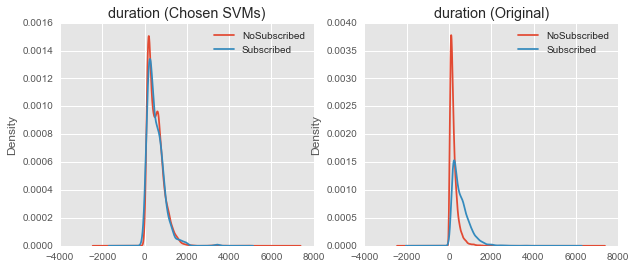

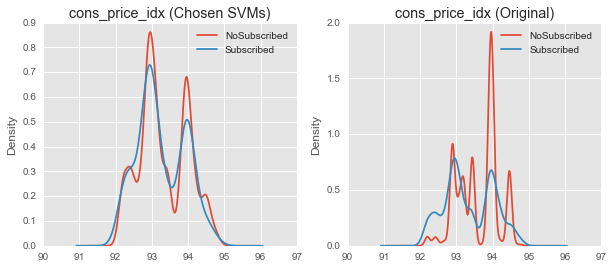

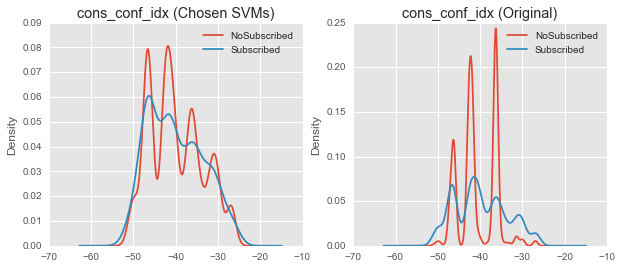

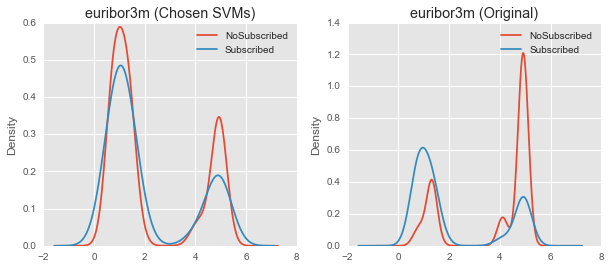

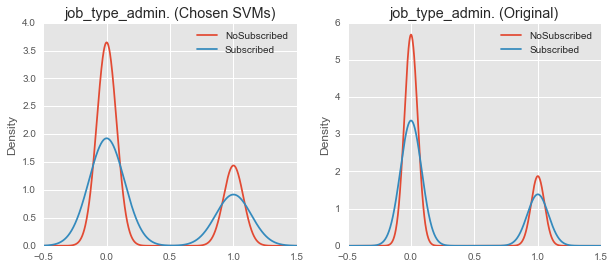

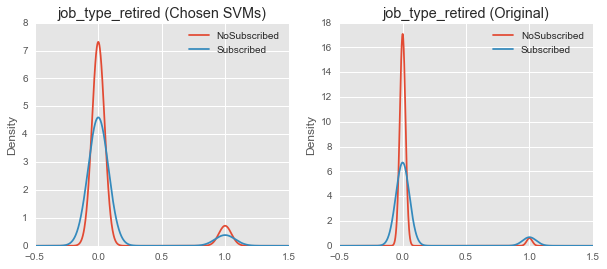

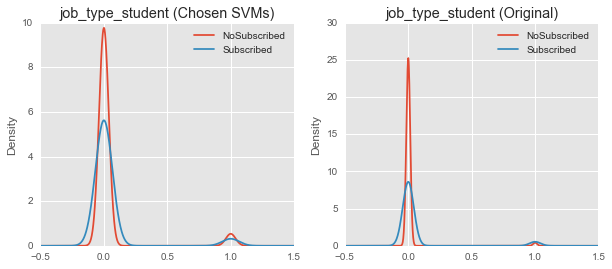

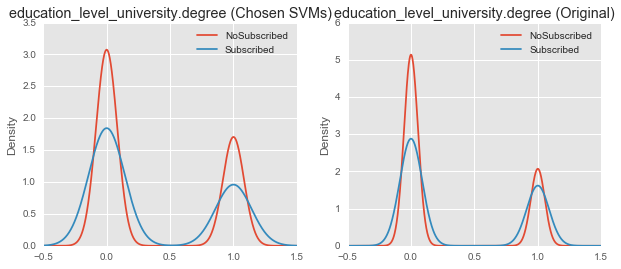

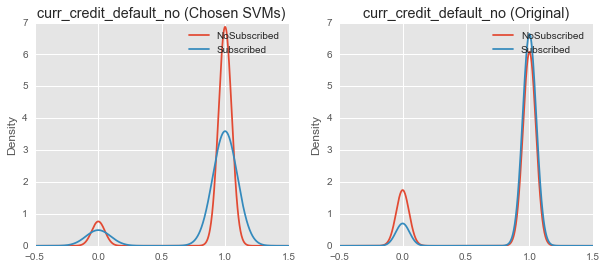

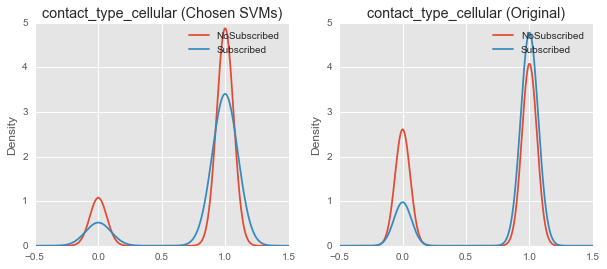

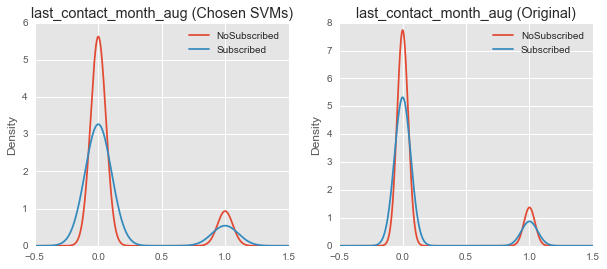

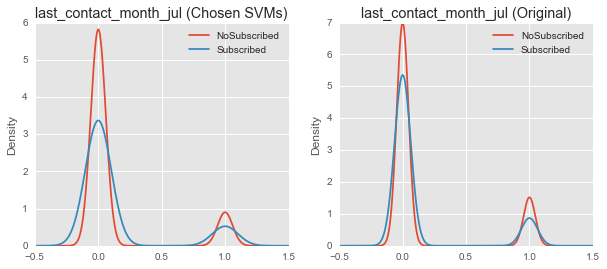

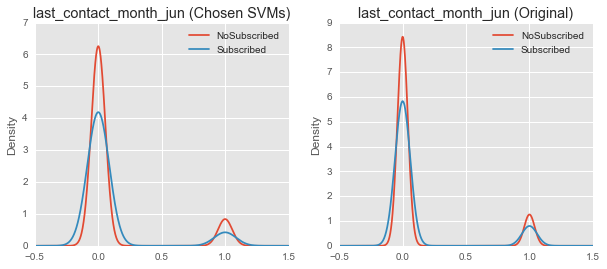

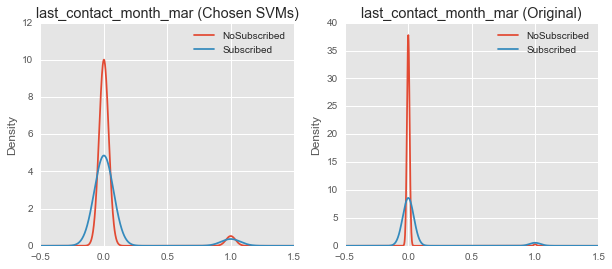

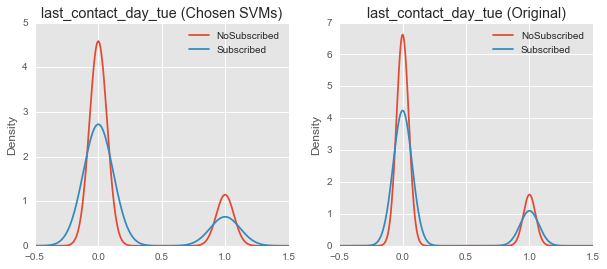

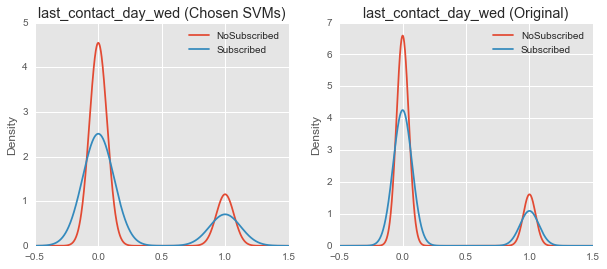

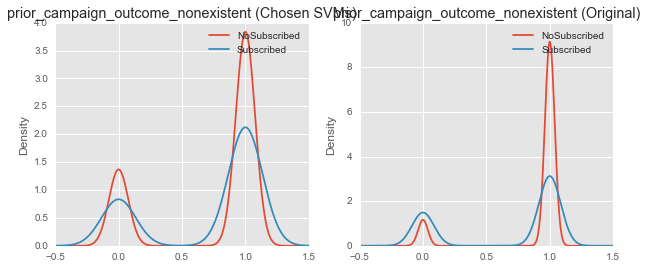

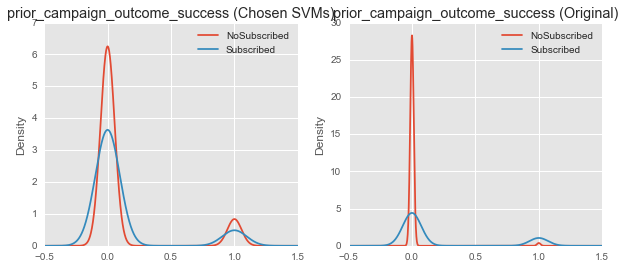

In [35]:
# display statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_support_group = df_support.groupby(['Subscribe'])
df_grouped = banking.groupby(['Subscribe'])

# plot KDE of Different variables
# use my variables from myX earlier
vars_to_plot = myX

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_support_group[v].plot.kde() 
    plt.legend(['NoSubscribed','Subscribed'])
    plt.title(v+' (Chosen SVMs)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['NoSubscribed','Subscribed'])
    plt.title(v+' (Original)')

### Support Vectors Insight

The separation in distributions for the support vectors is not as great as the separation in the original data. This is primarily due to the support vectors lying on the edge or border between the classes, considering the decision boundary is determined by only a subset of the training points.